В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [2]:
import pandas as pd
dataset_train_df = pd.read_csv('/content/train.csv')

In [3]:
print(dataset_train_df.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split

#визначаємо X та y
X = dataset_train_df.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = dataset_train_df['Exited']

#розбиття даних на train і validation піднабори
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # збереже пропорції 1 і 0
)

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [6]:
input_cols = X.columns.tolist()
target_col = 'Exited'

train_inputs = X_train
train_targets = y_train
val_inputs = X_val
val_targets = y_val

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [7]:
import numpy as np

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [8]:
numeric_cols, categorical_cols

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender'])

In [9]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,658.84,37.69,5.03,43008.17,1.59,0.79,0.49,117992.40
std,72.33,8.14,2.78,59906.63,0.53,0.41,0.50,45589.48
min,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83343.73
50%,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123613.91
75%,708.00,42.00,7.00,109949.05,2.00,1.00,1.00,156912.81
max,850.00,74.00,10.00,209767.31,4.00,1.00,1.00,199992.48


In [10]:
train_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [ ]:
from sklearn.impute import SimpleImputer


1) заповнення пропущених значень



In [14]:
train_inputs.shape

(12000, 10)

In [15]:
train_inputs[numeric_cols].isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


заповнення пропущених значень нам не підходить, бо їх немає. Дію не виконую
загалом, ця дія дає нам можливість заповнити пусті значення для того щоб модель працювала, бо без числових даних більша частина моделей може не працювати.

2) масштабування числових ознак

In [16]:
dataset_train_df[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,658.944133,37.739600,5.025267,42729.791988,1.590933,0.788800,0.489667,117784.666193
std,72.255926,8.218363,2.776678,59727.309419,0.532306,0.408174,0.499910,45734.445888
min,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83058.140000
50%,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123584.870000
75%,708.000000,42.000000,7.000000,109531.017500,2.000000,1.000000,1.000000,156884.705000
max,850.000000,74.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [18]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [19]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [20]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.54,0.35,0.50,0.21,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.29,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.34,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.43,0.70,0.52,0.33,1.00,1.00,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Так як нам важливо зберегти форму розподілу (0,1), пришвидшити і покращити якість моделі ми використовуємо метод масштабування числових ознак.

3)кодування категоріальних ознак

In [21]:
dataset_train_df[categorical_cols].nunique()

,0
Geography,3
Gender,2


In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [23]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [24]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [25]:
#генерууємо назви стовпців
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [26]:
encoder.transform(train_inputs[categorical_cols])[:10]

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [27]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [31]:
pd.set_option('display.max_columns', None)
train_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,France,Female,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
8463,0.577566,France,Female,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,1.0,0.0
8143,0.453461,France,Male,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0
11512,0.379475,Spain,Male,0.428571,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,0.0,1.0


кодування категоріальних ознак я використала для перетворення текстових значень на числові, які модель мл може прочитати/зрозуміти. Тому я перетворила текстові колоки Geography та Gender на числові, вважаю що це логічний крок для побудови моделі.

In [32]:
display(train_inputs[:5])
display(val_inputs[:5])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [33]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (12000, 15)
train_targets: (12000,)
val_inputs: (3000, 15)
val_targets: (3000,)


In [34]:
!pip install pyarrow --quiet

In [35]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [36]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

CPU times: user 7.96 ms, sys: 732 µs, total: 8.69 ms
Wall time: 9.02 ms


зчитуємо дані назад

In [37]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

CPU times: user 45.1 ms, sys: 12.6 ms, total: 57.6 ms
Wall time: 107 ms


In [38]:
#перевіримо чи правильно зберіглись дані
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (12000, 15)
train_targets: (12000,)
val_inputs: (3000, 15)
val_targets: (3000,)


In [39]:
val_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,0.589499,France,Male,0.357143,0.4,0.000000,0.333333,1.0,0.0,0.667682,1.0,0.0,0.0,0.0,1.0
8866,0.768496,France,Male,0.642857,0.6,0.000000,0.000000,1.0,0.0,0.885353,1.0,0.0,0.0,0.0,1.0
3244,0.589499,Spain,Male,0.250000,0.5,0.000000,0.333333,1.0,0.0,0.883589,0.0,0.0,1.0,0.0,1.0
12441,0.699284,Spain,Male,0.267857,0.5,0.658646,0.000000,1.0,0.0,0.528593,0.0,0.0,1.0,0.0,1.0


In [40]:
train_targets

,Exited
7180,0.0
10393,0.0
80,0.0
3365,0.0
12236,0.0
...,...
9493,0.0
8463,0.0
8143,0.0
11512,0.0


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')

In [42]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [43]:
print(numeric_cols + encoded_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [44]:
model.coef_.round(2)

array([[-0.87,  8.45, -0.08, -1.1 , -3.93, -0.19, -1.25,  0.19, -0.96,
         0.61, -1.05, -0.27, -1.13]])

In [45]:
print(model.coef_.tolist())

[[-0.8727057654948849, 8.451461197130401, -0.07507593826903385, -1.095227113484121, -3.934637049980205, -0.18752677354595151, -1.2534613460000872, 0.18932980315740233, -0.9601551360076453, 0.6079395180143473, -1.0533218301540488, -0.2721184810439519, -1.1334189671031802]]


In [46]:
print(model.intercept_)

[-1.40553745]


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

1) Confusion matrix

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, train_preds)

0.87425

In [49]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [50]:
train_preds = model.predict(X_train)

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds)

array([[9177,  381],
       [1128, 1314]])

In [54]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 87.42%
Accuracy: 87.17%


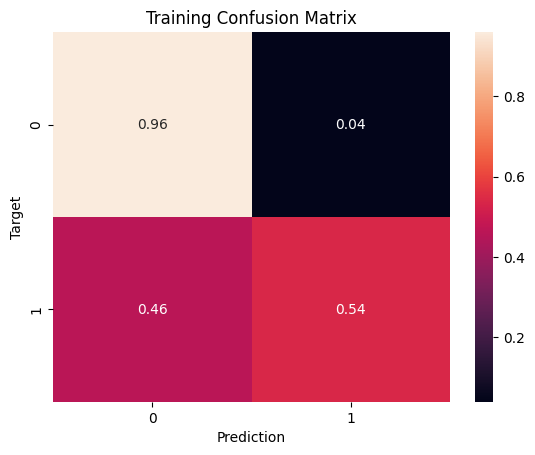

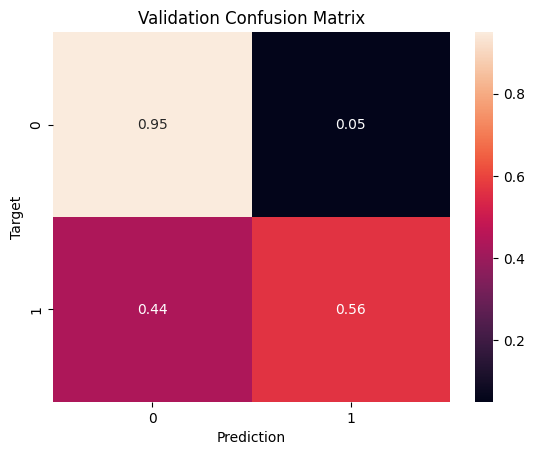

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

train_preds = predict_and_plot(X_train, train_targets, 'Training')
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Точність моделі на тестовому та валідаційному наборах перевищує 87%, що свідчить про те, що наша модель добре узагальнює дані, які вона раніше не бачила.

2) ROC Curve та AUROC

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Передбачаємо ймовірності класу 1(так)
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Обчислюємо ROC-криву
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

  #   roc_auc
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Побудова графіка
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve - {name}')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.show()


AUROC for Training: 0.88


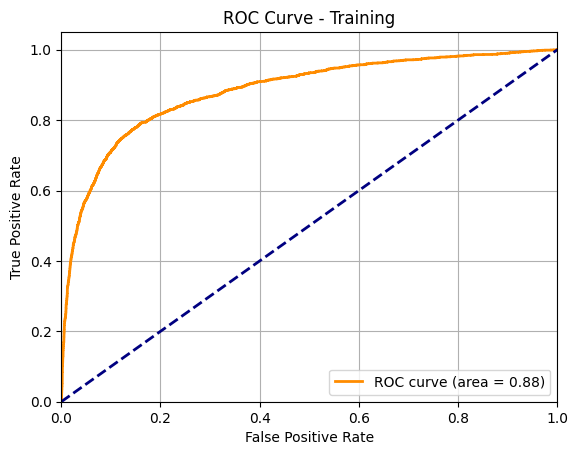

AUROC for Validation: 0.88


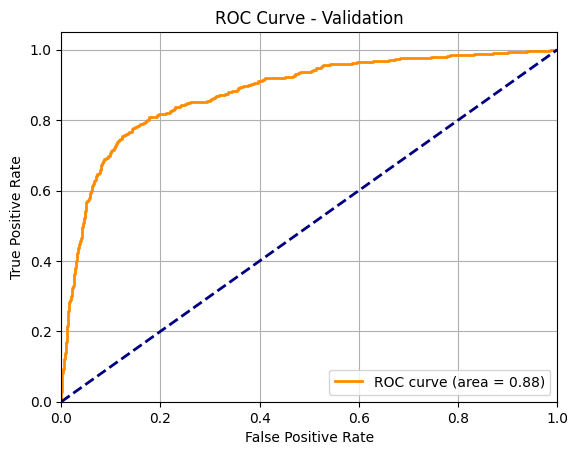

In [88]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

3) F1 Score для порога класифікації 0.5

In [108]:
from sklearn.metrics import f1_score

# 1. Ймовірності для TRAIN
y_train_proba = model.predict_proba(X_train)[:, 1]
y_train_pred_05 = (y_train_proba >= 0.5).astype(int)
f1_train_05 = f1_score(train_targets, y_train_pred_05)

# 2. Ймовірності для VALIDATION
y_val_proba = model.predict_proba(X_val)[:, 1]
y_val_pred_05 = (y_val_proba >= 0.5).astype(int)
f1_val_05 = f1_score(val_targets, y_val_pred_05)

# Вивід
print(f"F1 Score на тренувальних даних (поріг 0.5): {f1_train_05:.2f}")
print(f"F1 Score на валідаційних даних (поріг 0.5): {f1_val_05:.2f}")


F1 Score на тренувальних даних (поріг 0.5): 0.64
F1 Score на валідаційних даних (поріг 0.5): 0.64


те що F1 score Training та F1 score Validation =0.64%, що каже про те, що модель не перенавчається, що свідчить про середню якість класифікації.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [109]:
# Знайдемо найчастіший клас у тренувальній вибірці
majority_class = train_targets.mode()[0]
print(f"Мажоритарний клас: {majority_class}")


Мажоритарний клас: 0.0


In [110]:
# Модель, яка завжди передбачає мажоритарний клас
majority_train_preds = [majority_class] * len(train_targets)
majority_val_preds = [majority_class] * len(val_targets)

In [111]:
accuracy_train_baseline = accuracy_score(train_targets, majority_train_preds)
accuracy_val_baseline = accuracy_score(val_targets, majority_val_preds)

print(f"Baseline accuracy на TRAIN: {accuracy_train_baseline:.2f}")
print(f"Baseline accuracy на VAL:   {accuracy_val_baseline:.2f}")

Baseline accuracy на TRAIN: 0.80
Baseline accuracy на VAL:   0.80


In [112]:
# Передбачення реальною моделлю
model_train_preds = model.predict(X_train)
model_val_preds = model.predict(X_val)

# Accuracy реальної моделі
accuracy_train_model = accuracy_score(train_targets, model_train_preds)
accuracy_val_model = accuracy_score(val_targets, model_val_preds)

print(f"Model accuracy на TRAIN: {accuracy_train_model:.2f}")
print(f"Model accuracy на VAL:   {accuracy_val_model:.2f}")

Model accuracy на TRAIN: 0.87
Model accuracy на VAL:   0.87


Якість моделі - хороша.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [113]:
import joblib
joblib.dump(model, 'log_reg.joblib')
model_2 = joblib.load('log_reg.joblib')


In [114]:
# Наприклад, зробимо передбачення для валідаційних даних
preds = model_2.predict(X_val)
print(preds[:5])


[0. 0. 0. 0. 0.]


10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [117]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, dataset_train_df: pd.DataFrame):
    dataset_train_df[numeric_cols] = scaler.transform(dataset_train_df[numeric_cols])
    dataset_train_df[encoded_cols] = encoder.transform(dataset_train_df[categorical_cols])
    X_input = dataset_train_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [123]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, dataset_train_df[:5])

array([0.00654092, 0.0366679 , 0.37111937, 0.37653484, 0.97577854])

тут я замінила датафрейм на свій з сирих даних(початкових)

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [125]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [126]:
test_raw_df = pd.read_csv('test.csv')

In [127]:
predicted_probs = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

In [128]:
test_raw_df['Exited'] = predicted_probs

In [129]:
test_raw_df[['Exited']].head()

,Exited
0,0.075316
1,0.035366
2,0.153210
3,0.194872
4,0.055660


In [130]:
test_raw_df.to_csv('test_with_predictions.csv', index=False)

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [132]:
sample_submission = pd.read_csv('sample_submission.csv')

In [133]:
print(sample_submission.head())

      id  Exited
0  15000     0.5
1  15001     0.5
2  15002     0.5
3  15003     0.5
4  15004     0.5


In [134]:
predicted_probs = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

In [146]:
sample_submission['Exited'] = predicted_probs

In [150]:
sample_submission.to_csv('submission_log_reg.csv', index=False)

In [148]:
sample_submission['Exited'] = (predicted_probs >= 0.5).astype(int)

In [152]:
print(sample_submission.head())

      id  Exited
0  15000       0
1  15001       0
2  15002       0
3  15003       0
4  15004       0
